### Structure du dataset

L'arborescence des images dans PVF-10 est la suivante :

- PVF-10
    - Format 1
        - Train
            - Classe 1
            - Classe 2
            - ...
        - Test
            - Classe 1
            - Classe 2
            - ...
    - Format 2
        - Train
            - Classe 1
            - Classe 2
            - ...
        - Test
            - Classe 1
            - Classe 2
            - ...
    - ...

Récupérons cette structure **sous forme de dataframe** pour faciliter l'analyse

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

# Chemin du dataset
base_path = "PVF-10"

# On va créer un dataframe avec pour chaque image :
# - son chemin
chemin_img = []
# - son format déclaré
format_img = []
# - son ensemble train / test
train_test_img =[]
# - sa classe
classe_img =[]
# - son nom
nom_img = []
# - son type
type_img = []
# - sa largeur
largeur_img = []
# - sa hauteur
hauteur_img = []
# - son nb de canaux
canaux_img = []

# Pour chaque répertoire format
for format_folder_name in os.listdir(base_path):
    format_path = os.path.join(base_path,format_folder_name)
    # Pour chaque répertoire train/test
    for train_test_folder_name in os.listdir(format_path):
        train_test_path = os.path.join(format_path,train_test_folder_name)
        # Pour chaque répertoire classe
        for class_folder_name in os.listdir(train_test_path):
            class_path = os.path.join(train_test_path,class_folder_name)
            # Pour chaque image
            for img_filename in os.listdir(class_path):
                img_path = os.path.join(class_path,img_filename) # on récupère son chemin
                img_name,img_extension = os.path.splitext(img_filename) # on récupère son nom et son extension
                img = cv2.imread(img_path) # on charge l'image pour récupérer ses infos dimensionelles

                # Alimentation des colonnes du dataframe
                chemin_img.append(img_path)
                format_img.append(format_folder_name)
                train_test_img.append(train_test_folder_name)
                classe_img.append(class_folder_name)
                nom_img.append(img_name)
                type_img.append(img_extension)
                largeur_img.append(img.shape[1])
                hauteur_img.append(img.shape[0])
                canaux_img.append(img.shape[2])

df_pvf10 = pd.DataFrame(
    {
        "Chemin": chemin_img,
        "Format" : format_img,
        "Train_Test" : train_test_img,
        "Classe" : classe_img,
        "Nom" : nom_img,
        "Type" : type_img,
        "Largeur" : largeur_img,
        "Hauteur" : hauteur_img,
        "Canaux": canaux_img
    }
)

display(df_pvf10)


,Chemin,Format,Train_Test,Classe,Nom,Type,Largeur,Hauteur,Canaux
0,PVF-10\PVF_10_110x60\test\01bottom dirt\DJI_20...,PVF_10_110x60,test,01bottom dirt,DJI_20230222130104_0215_T_000009,.png,60,110,3
1,PVF-10\PVF_10_110x60\test\01bottom dirt\DJI_20...,PVF_10_110x60,test,01bottom dirt,DJI_20230222130227_0261_T_000021,.png,60,110,3
2,PVF-10\PVF_10_110x60\test\01bottom dirt\DJI_20...,PVF_10_110x60,test,01bottom dirt,DJI_20230222130338_0301_T_000007,.png,60,110,3
3,PVF-10\PVF_10_110x60\test\01bottom dirt\DJI_20...,PVF_10_110x60,test,01bottom dirt,DJI_20230222130345_0306_T_000007,.png,60,110,3
4,PVF-10\PVF_10_110x60\test\01bottom dirt\DJI_20...,PVF_10_110x60,test,01bottom dirt,DJI_20230222131104_0519_T_000009,.png,60,110,3
...,...,...,...,...,...,...,...,...,...
16732,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,PVF_10_Ori,train,10healthy panel,DJI_20231121165445_0658_T_000004,.tif,69,109,3
16733,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,PVF_10_Ori,train,10healthy panel,DJI_20231121165536_0682_T_000002,.tif,65,110,3
16734,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,PVF_10_Ori,train,10healthy panel,DJI_20231121165610_0698_T_000002,.tif,63,109,3
16735,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,PVF_10_Ori,train,10healthy panel,DJI_20231121165943_0012_T_000003,.tif,70,116,3


In [2]:
df_pvf10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chemin      16737 non-null  object
 1   Format      16737 non-null  object
 2   Train_Test  16737 non-null  object
 3   Classe      16737 non-null  object
 4   Nom         16737 non-null  object
 5   Type        16737 non-null  object
 6   Largeur     16737 non-null  int64 
 7   Hauteur     16737 non-null  int64 
 8   Canaux      16737 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


Nous avons réussi à lire les **16737 fichiers** du dataset pour charger leur image => **tous les fichiers sont valides**.

### Cohérence des données : les formats d'images

Le dataframe a 16737 lignes soit 3x5579, ce qui correspondrait bien à la description faite par les créateurs du dataset : **5579 images dans 3 formats différents**
- original
- 110x60
- 112x112

Vérifions-le

In [3]:
print(df_pvf10['Format'].value_counts())

Format
PVF_10_110x60     5579
PVF_10_112x112    5579
PVF_10_Ori        5579
Name: count, dtype: int64


Le résultat est conforme. Pour plus de lisibilité, **supprimons le préfixe PVF_10_ du format** 

In [4]:
df_pvf10['Format'] = df_pvf10['Format'].str.removeprefix("PVF_10_")

Vérifions les types d'images pour chaque format

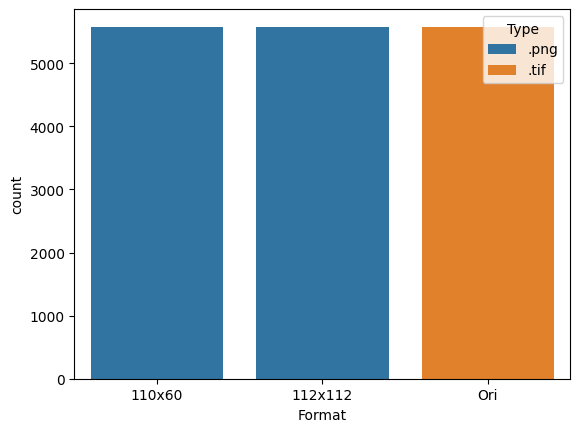

In [5]:
sns.countplot(data=df_pvf10,x='Format',hue='Type')
plt.show()

Le format original est donc constitué **exclusivement de type tif**. Les 2 autres formats sont constitués **exclusivement de type png**

Vérifions le nombre de canaux pour chaque format

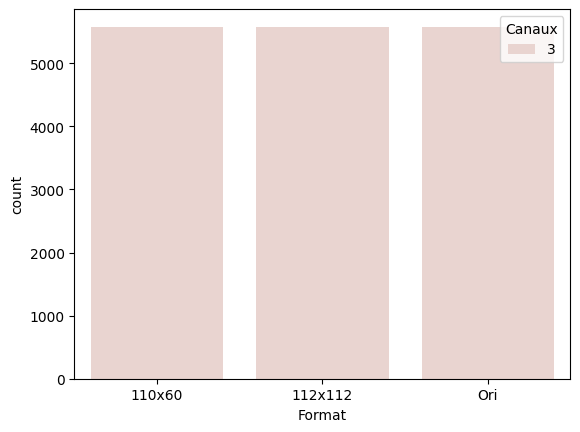

In [6]:
sns.countplot(data=df_pvf10,x='Format',hue='Canaux')
plt.show()

Toutes les images ont **3 canaux**. On pourra les afficher en couleur.

Vérifions que ce sont les mêmes images dans les trois formats différents

In [7]:
print ("Noms d'images différents par format :")
display(df_pvf10.groupby('Format')['Nom'].nunique())

# On récupère les nom de toutes les images au format 110 x 60
set_110_60 = set(df_pvf10.loc[df_pvf10['Format']=="110x60"]["Nom"].values)

# On récupère les nom de toutes les images au format 112 x 112
set_112_112 = set(df_pvf10.loc[df_pvf10['Format']=="112x112"]["Nom"].values)

# On récupère les nom de toutes les images au format original
set_ori = set(df_pvf10.loc[df_pvf10['Format']=="Ori"]["Nom"].values)

print ("S'agit-il des mêmes noms d'images dans les différents formats ? => ",set_110_60 == set_112_112 == set_ori)

Noms d'images différents par format :


Format
110x60     5579
112x112    5579
Ori        5579
Name: Nom, dtype: int64

S'agit-il des mêmes noms d'images dans les différents formats ? =>  True


**Chaque image apparaît donc bien 3 fois dans le dataset : une fois pour chaque format**

**Affichons** une même image prise au hasard dans les 3 formats.

,Chemin,Format,Train_Test,Classe,Nom,Type,Largeur,Hauteur,Canaux
3672,PVF-10\PVF_10_110x60\train\08string short circ...,110x60,train,08string short circuit,DJI_20231116163304_0503_T_000002,.png,60,110,3
5922,PVF-10\PVF_10_112x112\test\08string short circ...,112x112,test,08string short circuit,DJI_20231116163304_0503_T_000002,.png,112,112,3
14830,PVF-10\PVF_10_Ori\train\08string short circuit...,Ori,train,08string short circuit,DJI_20231116163304_0503_T_000002,.tif,100,50,3


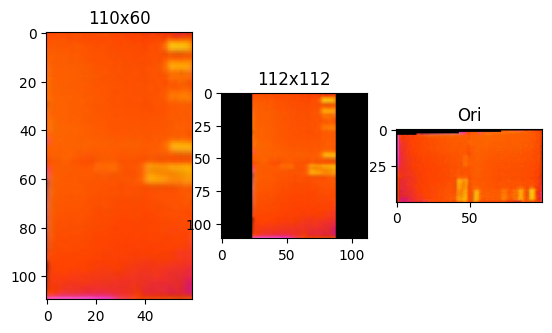

In [8]:
# Récupérer un nom d'image au hasard
nom_img_aleatoire = df_pvf10["Nom"].sample(n=1).iloc[0]

# Filtrer le dataframe sur ce nom d'image
df_img_aleatoire = df_pvf10.loc[df_pvf10["Nom"]==nom_img_aleatoire]
display(df_img_aleatoire)

num_subplot=131
# Boucle sur chaque ligne du datafframe filtré
for index,row in df_img_aleatoire.iterrows():
    plt.subplot(num_subplot)
    img = cv2.imread(row["Chemin"]) # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    plt.imshow(img) # Affichage de l'image
    plt.title(row["Format"]) # Titre  = format
    num_subplot += 1


plt.show()


Vérifions la distribution des dimensions d'images dans les différents format. Commençons par le format original

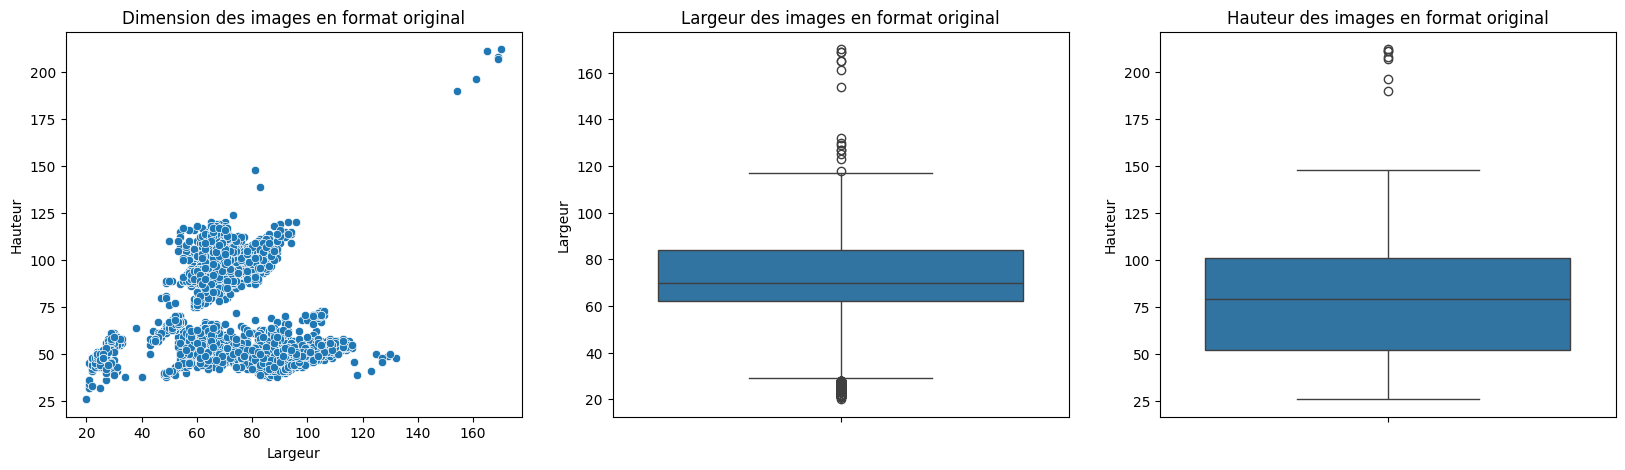

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.scatterplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], x="Largeur", y="Hauteur")
plt.title("Dimension des images en format original")
plt.subplot(132)
sns.boxplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], y="Largeur")
plt.title("Largeur des images en format original")
plt.subplot(133)
sns.boxplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], y="Hauteur")
plt.title("Hauteur des images en format original")
plt.show()

On est environ sur un **facteur 8 entre les plus petites images et les plus grandes dans le format original**.

Pas de valeurs aberrantes : on est entre 20 et 200 pixels, ce qui semble normal pour un panneau PV pris par un drone.

**Affichons les images ayant la plus petite et la plus grande largeur**

Les plus petites images (en largeur) :


,Chemin,Format,Train_Test,Classe,Nom,Type,Largeur,Hauteur,Canaux
16388,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,Ori,train,10healthy panel,DJI_20230512123345_0384_T_000003,.tif,20,26,3
11641,PVF-10\PVF_10_Ori\test\10healthy panel\DJI_202...,Ori,test,10healthy panel,DJI_20230308154214_0098_T_000012,.tif,21,45,3
12018,PVF-10\PVF_10_Ori\train\01bottom dirt\DJI_2023...,Ori,train,01bottom dirt,DJI_20230512123345_0384_T_000004,.tif,21,32,3
15081,PVF-10\PVF_10_Ori\train\09substring open circu...,Ori,train,09substring open circuit,DJI_20230512122847_0238_T_000004,.tif,21,32,3
16238,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,Ori,train,10healthy panel,DJI_20230308150813_0013_T_000002,.tif,21,45,3


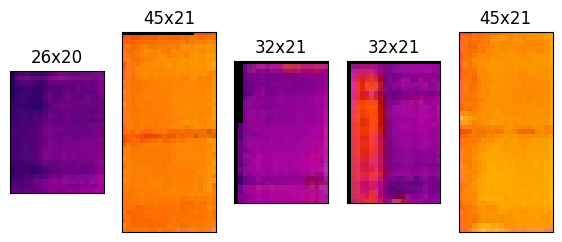

Les plus grandes images (en largeur):


,Chemin,Format,Train_Test,Classe,Nom,Type,Largeur,Hauteur,Canaux
14410,PVF-10\PVF_10_Ori\train\07short circuit panel\...,Ori,train,07short circuit panel,DJI_20230223132111_0227_T_000001,.tif,170,212,3
11597,PVF-10\PVF_10_Ori\test\10healthy panel\DJI_202...,Ori,test,10healthy panel,DJI_20230223130819_0183_T_000001,.tif,169,208,3
15771,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,Ori,train,10healthy panel,DJI_20230223140105_0063_T_000003,.tif,169,207,3
14415,PVF-10\PVF_10_Ori\train\07short circuit panel\...,Ori,train,07short circuit panel,DJI_20230223140105_0063_T_000001,.tif,165,211,3
15738,PVF-10\PVF_10_Ori\train\10healthy panel\DJI_20...,Ori,train,10healthy panel,DJI_20230223130819_0183_T_000002,.tif,165,211,3


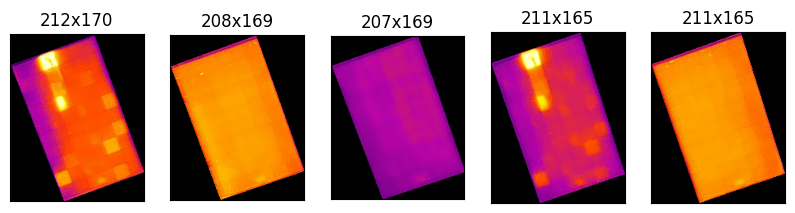

In [10]:
# Filtrer le dataframe sur les plus petites largeurs du format Ori
df_smallest_img = df_pvf10[df_pvf10["Format"]=="Ori"].nsmallest(5,"Largeur")
print("Les plus petites images (en largeur) :")
display(df_smallest_img)

plt.figure(figsize=(7,5))
num_subplot=151
# Boucle sur chaque ligne du dataframe filtré
for index,row in df_smallest_img.iterrows():
    plt.subplot(num_subplot)
    img = cv2.imread(row["Chemin"]) # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    plt.imshow(img) # Affichage de l'image
    plt.title(f"{row["Hauteur"]}x{row["Largeur"]}") # Titre  = largeur x hauteur
    plt.xticks([])
    plt.yticks([])
    num_subplot += 1

plt.show()

# Filtrer le dataframe sur les plus grandes largeurs du format Ori
df_largest_img = df_pvf10[df_pvf10["Format"]=="Ori"].nlargest(5,"Largeur")
print("Les plus grandes images (en largeur):")
display(df_largest_img)

plt.figure(figsize=(10,7))
num_subplot=151
# Boucle sur chaque ligne du dataframe filtré
for index,row in df_largest_img.iterrows():
    plt.subplot(num_subplot)
    img = cv2.imread(row["Chemin"]) # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    plt.imshow(img) # Affichage de l'image
    plt.title(f"{row["Hauteur"]}x{row["Largeur"]}") # Titre  = largeur x hauteur
    plt.xticks([])
    plt.yticks([])
    num_subplot += 1

plt.show()



**Les images les plus petites comme les plus grandes du format original sont correctes**, elles ne sont pas aberrantes 

Vérifions les dimensions d'images pour les formats indiqués 110x60 et 112x112. Logiquement on devrait trouver une unique valeur pour la largeur et la hauteur dans chaque format

In [11]:
print("Format 112x112")
print("Largeurs : ",df_pvf10[df_pvf10["Format"]=="112x112"]['Largeur'].unique())
print("Hauteurs : ",df_pvf10[df_pvf10["Format"]=="112x112"]['Hauteur'].unique())

print("\nFormat 110x60")
print("Largeurs : ",df_pvf10[df_pvf10["Format"]=="110x60"]['Largeur'].unique())
print("Hauteurs : ",df_pvf10[df_pvf10["Format"]=="110x60"]['Hauteur'].unique())


Format 112x112
Largeurs :  [112]
Hauteurs :  [112]

Format 110x60
Largeurs :  [60 62 59 61 63 65 58 57 64]
Hauteurs :  [110  61  60  57  55  63  59  62  56  58  64  53  54  52]


**Le format 112x112 ne contient que des images réellement de largeur 112 et de hauteur 112.**

En revanche, le format 110x60 indique plusieurs tailles d'images réelles. Visualisons la distribution des tailles d'images différentes de 110x60 dans ce format.

Pourcentage d'images au format 110x60 de taille différente de 110x60 : 4.19 %


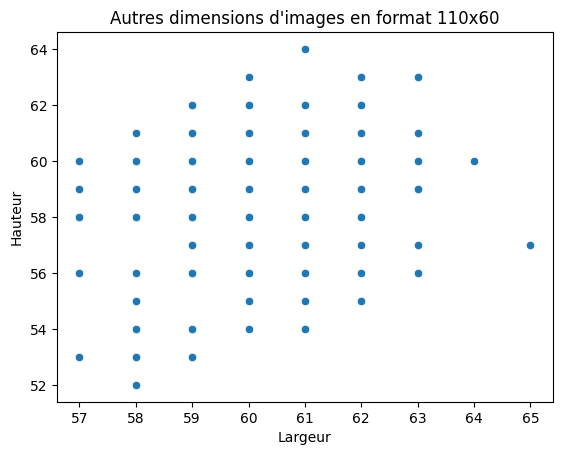

In [12]:
# Filtre sur le format 110x60
df_110x60 = df_pvf10.loc[df_pvf10["Format"]=="110x60"]
# Filtre sur le format 110x60 avec une hauteur ou une largeur différente de resp. 110 ou 60
df_110x60_anomaly = df_110x60.loc[(df_110x60["Hauteur"]!=110)|(df_110x60["Largeur"]!=60)]
print("Pourcentage d'images au format 110x60 de taille différente de 110x60 :",np.round(len(df_110x60_anomaly)/len(df_110x60) *100,2), "%")

# Affichage d'un nuage de points
sns.scatterplot(data=df_110x60_anomaly, x="Largeur", y="Hauteur")
plt.title("Autres dimensions d'images en format 110x60")
plt.show()

Nous avons donc **4% d'images plutôt carrées dans le format 110x60** (de dimension réelle autour de 60 x 60). Affichons-en quelques-unes

,Chemin,Format,Train_Test,Classe,Nom,Type,Largeur,Hauteur,Canaux
2687,PVF-10\PVF_10_110x60\train\05hot cell\DJI_2023...,110x60,train,05hot cell,DJI_20230302161225_0180_T_000010,.png,59,59,3
5039,PVF-10\PVF_10_110x60\train\10healthy panel\DJI...,110x60,train,10healthy panel,DJI_20230302161225_0180_T_000002,.png,62,63,3
5066,PVF-10\PVF_10_110x60\train\10healthy panel\DJI...,110x60,train,10healthy panel,DJI_20230302163348_0658_T_000022,.png,63,60,3
2629,PVF-10\PVF_10_110x60\train\05hot cell\DJI_2023...,110x60,train,05hot cell,DJI_20230302160901_0051_T_000008,.png,60,59,3
69,PVF-10\PVF_10_110x60\test\03Debris cover\DJI_2...,110x60,test,03Debris cover,DJI_20230302164314_0901_T_000003,.png,62,61,3


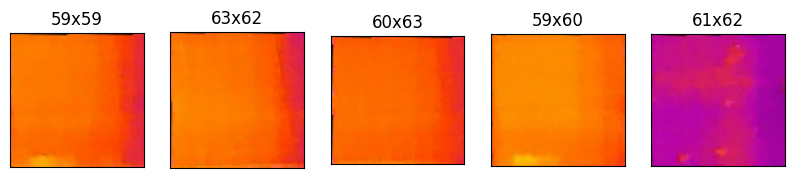

In [13]:
df_110x60_anomaly_5x = df_110x60_anomaly.sample(5)
display(df_110x60_anomaly_5x)

plt.figure(figsize=(10,5))
num_subplot=151
# Boucle sur chaque ligne du dataframe filtré
for index,row in df_110x60_anomaly_5x.iterrows():
    plt.subplot(num_subplot)
    img = cv2.imread(row["Chemin"]) # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    plt.imshow(img) # Affichage de l'image
    plt.title(f"{row["Hauteur"]}x{row["Largeur"]}") # Titre  = largeur x hauteur
    plt.xticks([])
    plt.yticks([])
    num_subplot += 1

plt.show()

**Ces images carrées semblent tout-à-fait correctes**. Cependant, nous devons garder en tête, pour les traitements ultérieurs (preprocessing, etc.), que **les images du format 110x60 ne sont pas de dimension homogène** et peuvent nécessiter un resizing.

##### Conclusion sur la cohérence des formats d'images

Ce dataset est constitué de 16737 images IR. Précisément, il s'agit de 5579 images différentes, disponibles chacune dans 3 formats différents :
- format original : images .tif en couleurs, d'une dimension approximative allant de 20x20 pixels à 200x200 pixels
- format 110x60 : images .png en couleurs. Attention 4% des images ne sont pas de dimension 110x60, mais plutôt carrées (dimension autour de 60x60)
- format 112x112 : images .png en couleurs, de dimension 112x112 pixels

### Cohérence des données : les classes

Vérifions les différentes classes à notre disposition

In [14]:
print(*df_pvf10['Classe'].unique(), sep =' | ')

01bottom dirt | 02break | 03Debris cover | 04junction box heat | 05hot cell | 06shadow | 07short circuit panel | 08string short circuit | 09substring open circuit | 10healthy panel


Nous avons 10 classes conformément à la description : **9 classes de défauts et une classe healthy**

Pour plus de lisibilité, **supprimons les 2 premiers chiffres** de la classe 

In [15]:
df_pvf10['Classe'] = df_pvf10['Classe'].str[2:]

Vérifions maintenant que nous avons bien toutes les classes représentées de manière équilibrée

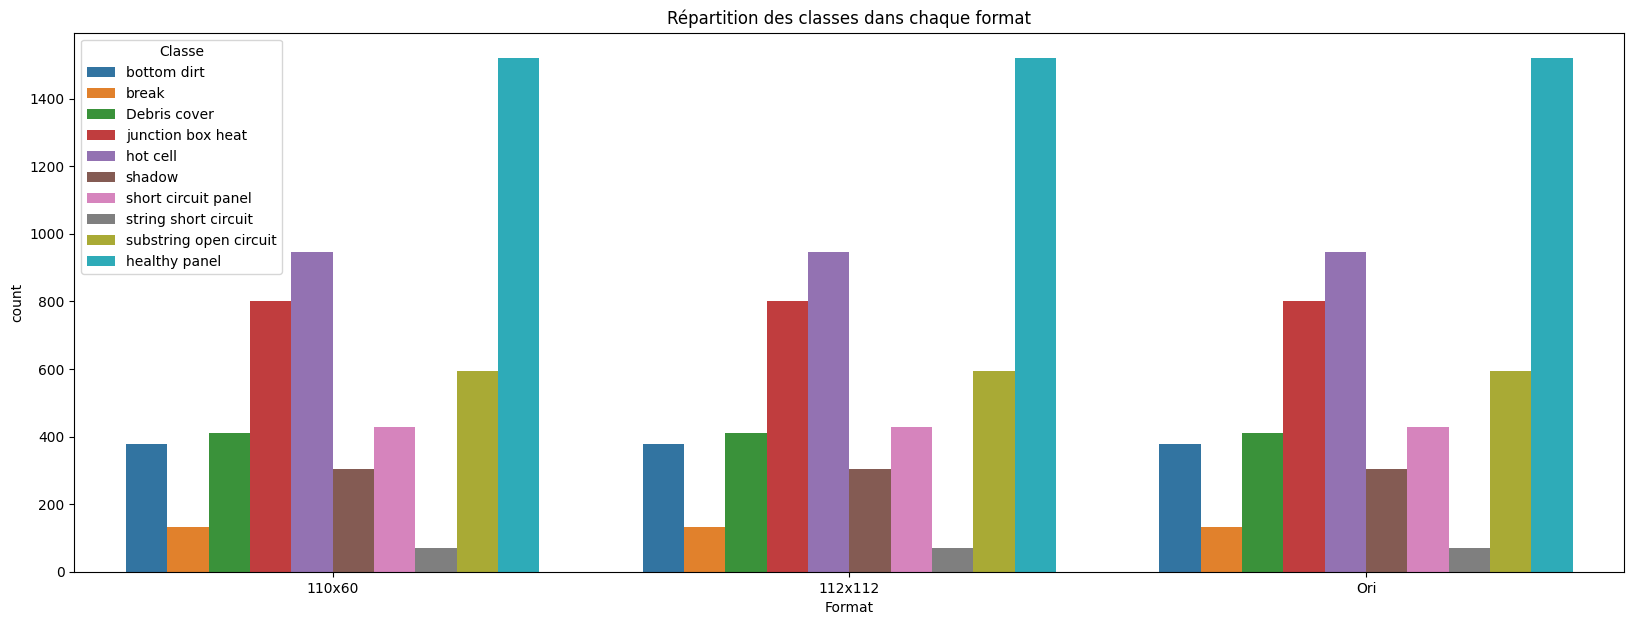

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_pvf10,x='Format',hue='Classe')
plt.title("Répartition des classes dans chaque format")
plt.show()

**Les classes sont plutôt équilibrées** : on prêtra attention toutefois attention aux classes *break* et *string short circuit* qui sont les moins représentées.

La classe *healthy panel* est plus représentée que les autres, mais de manière raisonnable.

La distribution est identique pour chaque format, ce qui est normal puisque ce sont les mêmes images qu'on retrouve d'un format à l'autre

Vérifions maintenant le **découpage en train / test** proposé dans le dataset

In [17]:
display(df_pvf10.groupby('Format')['Train_Test'].value_counts(normalize=True))

Format   Train_Test
110x60   train         0.900699
         test          0.099301
112x112  train         0.900699
         test          0.099301
Ori      train         0.900699
         test          0.099301
Name: proportion, dtype: float64

Les créateurs du dataset ont, pour chaque format, proposé un **échantillon de test correspondant à 10%** des images, ce qui est cohérent

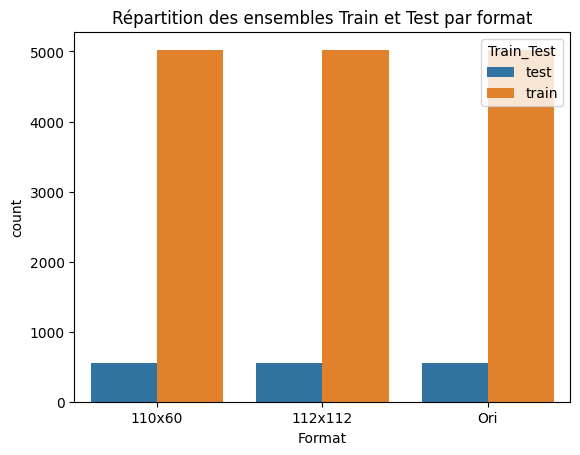

In [18]:
sns.countplot(data=df_pvf10,x='Format',hue='Train_Test')
plt.title("Répartition des ensembles Train et Test par format")
plt.show()

Vérifions que la répartition des classes est conservée entre ensemble train et test.

d:\Sources\PVF\env\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\maxbe\AppData\Local\Temp\ipykernel_22576\2887011152.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\maxbe\AppData\Local\Temp\ipykernel_22576\2887011152.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


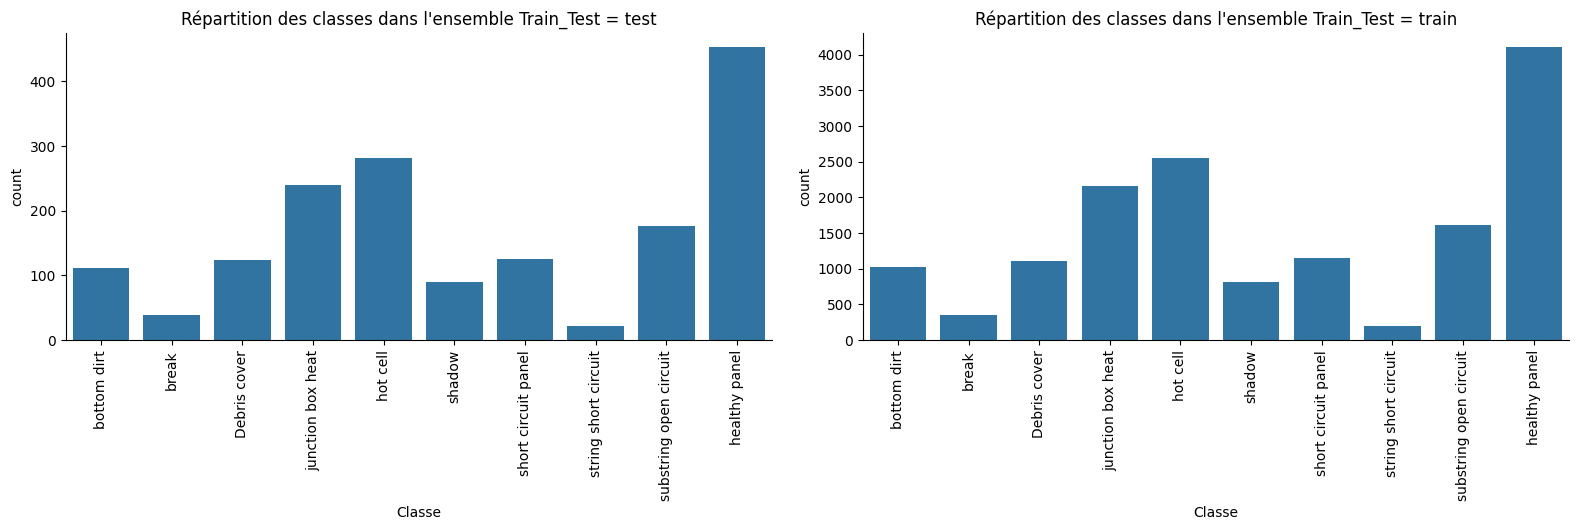

In [19]:
g = sns.FacetGrid(df_pvf10, col="Train_Test", sharey=False,height=4, aspect=2)
g.map(sns.countplot, "Classe")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Répartition des classes dans l'ensemble {ax.get_title()}")
plt.show()


**La répartition des différentes classes est clairement conservée entre ensembles train et test**

Au hasard, **affichons une image de chaque classe** dans les 3 formats et les 2 sous-ensembles train et test

Echantillon de l'ensemble test du format 110x60


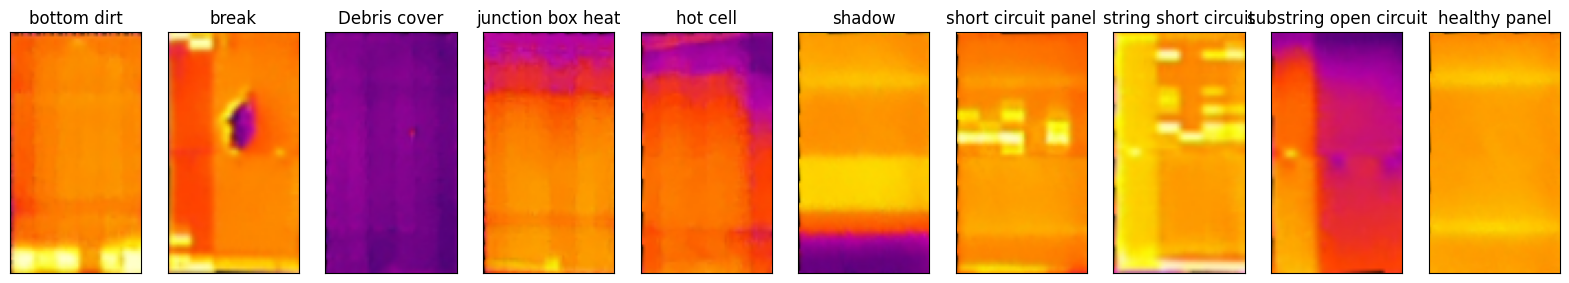

Echantillon de l'ensemble train du format 110x60


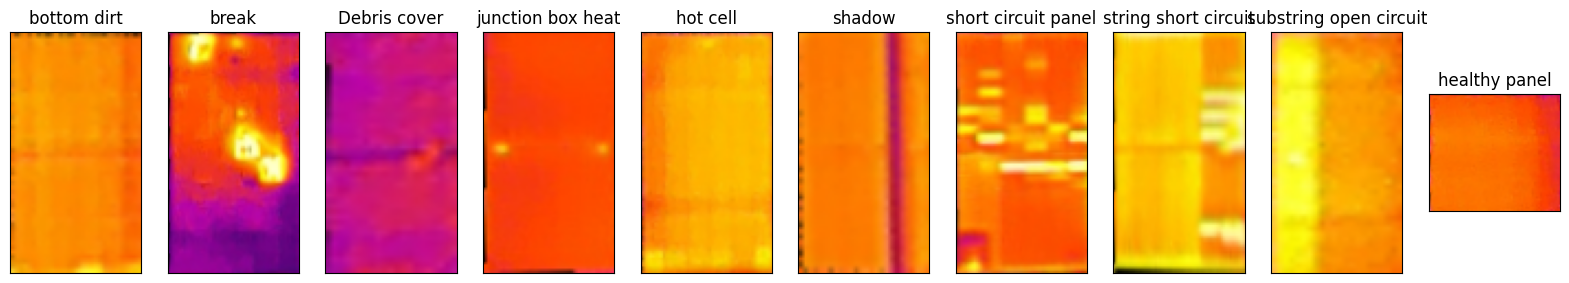

Echantillon de l'ensemble test du format 112x112


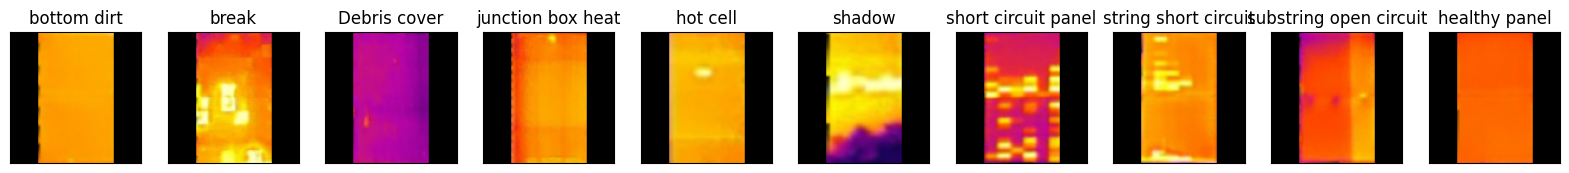

Echantillon de l'ensemble train du format 112x112


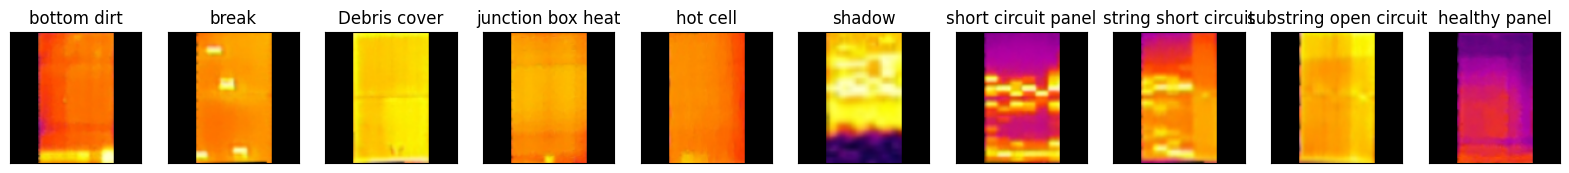

Echantillon de l'ensemble test du format Ori


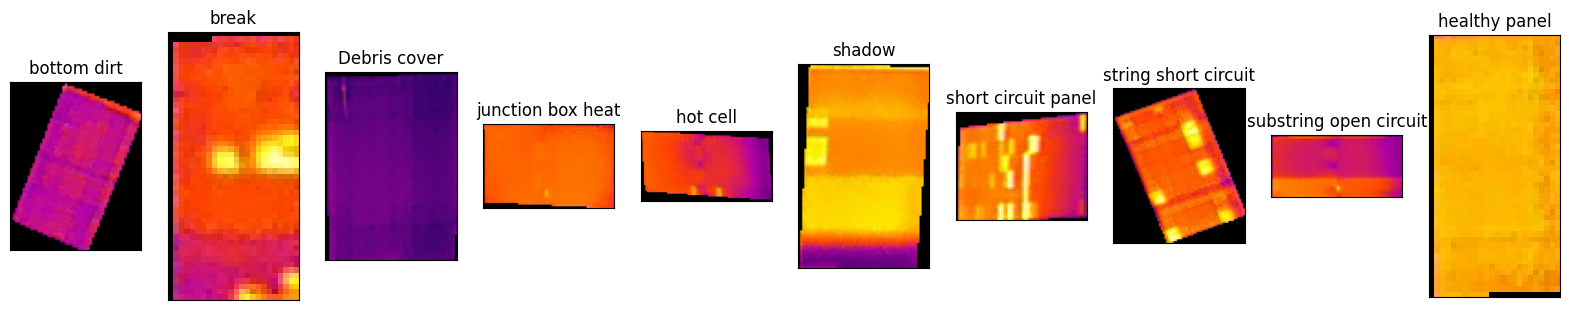

Echantillon de l'ensemble train du format Ori


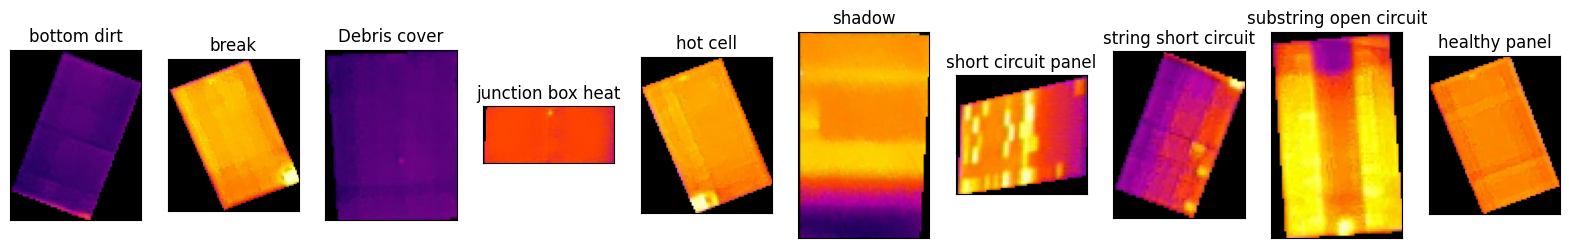

In [20]:
# Pour chaque format
for monFormat in df_pvf10['Format'].unique():
    # Pour chaque ensemble train_test
    for monEnsemble in df_pvf10['Train_Test'].unique():
        print (f"Echantillon de l'ensemble {monEnsemble} du format {monFormat}")
        # Filtrage du dataframe sur ce format et cet ensemble
        df_format_ensemble = df_pvf10.loc[(df_pvf10["Format"]==monFormat)&(df_pvf10["Train_Test"]==monEnsemble)]
        # Initialisation de la figure
        plt.figure(figsize=(20,7))
        num_plot=1
        # Pour chaque classe du dataframe filtré
        for classe in df_format_ensemble['Classe'].unique():
            classe_sample = df_format_ensemble.loc[(df_format_ensemble["Classe"]==classe)].sample(1).iloc[0] # Récupération d'une ligne au hasard pour cette classe  
            img = cv2.imread(classe_sample["Chemin"]) # Récupération de l'image en couleur
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
            plt.subplot(1,10,num_plot) # Positionnement sur le subplot
            plt.imshow(img) # Affichage de l'image
            plt.title(classe) # Titre  = classe
            plt.xticks([])
            plt.yticks([])
            num_plot += 1

        plt.show()


##### Conclusion sur la cohérence des classes

Le dataset proposé classe les images en 10 catégories : 
- une catégorie *healthy panel* représentant un peu plus d'un quart des observations
- 9 catégories de défauts pour le reste, réparties de manière plutôt équilibrée

Dans les étapes de modélisation, on prêtera toutefois attention aux classes *break* et *string short circuit* qui sont un peu moins représentées.


Les constructeurs du dataset ont également proposé un découpage entre ensemble d'entraînement (train) et de test :
- l'ensemble de test représente 10% environ des observations
- la répartition des classes est conservée entre ensembles train et test

Ce découpage train / test est donc conforme aux standards de l'apprentissage supervisé, mais rien ne nous empêche d'en choisir un différent au moment de la modélisation

### Analyse des images

In [21]:
# Export du dataframe
df_pvf10.to_csv('structure_pvf_10.csv',index=False)

Doublons : vérification pas d'images strictement identiques entre elles.

Valeurs manquantes : vérification pas d'image vide ou très "sombre"

Analyser la distribution des canaux RGB. Voir s'il y a des spécificités par classe

Convertir en niveaux de gris et analyser la distribution de l'intensité. Voir s'il y a des spécificités par classe

Analyser la variance des gradients => bcp de zones uniformes, ou riches en détails ?